# **Cual es la forma mas barata de viajar?**

## **Analizando Precios de Pasajes de Avion: Existe una forma para comprar siempre los pasajes mas baratos?**

*Milagros Urta*

Especialista de Análisis de Datos (EAD2)

# Indice

3) Planeteamiento del problema  
4) Objetivos  
&nbsp;&nbsp;&nbsp;&nbsp; 4.1. Objetivo general  
&nbsp;&nbsp;&nbsp;&nbsp; 4.2. Objetivos especificos  
5) Hipotesis     
6) Descripcion del Dataset  
&nbsp;&nbsp;&nbsp;&nbsp; 6.1. Descrpcion de las variables  
7) Analisis Exploratorio, Descriptivo y Visual de los datos  
8) Contraste de hipotesis  
9) Resultados  
10) Conclusiones  

# Planteamiento del problema

Este analisis busca encontrar si existe una forma de optimizar la compra de pasajes de avion mediante la combinacion de aerolinea, horarios y escalas, logrando asi siempre encontrar la opcion mas economica.


# Objetivos

## Objetivos generales

Determinar que variables influyen en el precio de un pasaje aereo y evaluar como estas se pueden combinar a nuestro favor

## Objetivos específicos

Evaluar si en igualdad de condiciones, una de las siguientes variables tiene una mayor incidencia en el precio de un pasaje aereo tanto de forma positiva o negativa.
1. Antelacion de la compra
2. Cantidad de escalas
3. Aerolinea
4. Hora de salida

# Hipótesis

En general, uno asume que cuanto mas escalas tenga el vuelo, mas barato sera el pasaje. 
Tambien que hay aerolineas mas baratas que otras, y que cuanto antes compremos el pasaje, significara un menor precio.
Buscaremos demostrar si estas situacion efectivamente se dan.

1. Primer Contraste:  
H0: Cuanto mas cerca de la fecha de viaje, mas caro el pasaje  
H1: El precio es independiente de con cuanta antelacion se saca el pasaje

2. Segundo Contraste:  
H0: Mas escalas significan un precio menor  
H1: El precio es independiente a las escalas

3. Tercer Contraste:  
H0: La arolinea influye en el precio  
H1: Podemos conseguir un pasaje barato en cualquier aerolinea

# Descripcion del Dataset

[Link al dataset](https://github.com/Miliurta/Entrega-Final-EAD2/blob/main/dataset_vuelos.csv)


## Descripción de las variables

**Descripción de las variables:**

1) *Airline:* Variable categorica que incluye el nombre de la compania aerea.  
2) *Flight:* Variable cateogira con informacion sobre el codigo de vuelo.  
3) *Source City:* Variable categorica que indica la ciudad de partida del vuelo.  
4) *Departure Time:* Variable categorica derivavada de los horarios de despegue los vuelos, la cual agrupa la hora de salida en diferentes momentos del dia.  
5) *Stops:* Variable cateogria con la cantidad de escalas en el vuelo.  
6) *Arrival Time:* Variable categorica derivavada de los horarios de aterrizaje los vuelos, la cual agrupa la hora de llegada en diferentes momentos del dia.  
7) *Destination City:* Variable categorica que indica la ciudad de llegada del vuelo.  
8) *Class:* Variable categoria que indica el tipo de pasaje (ej.: Economy, Business, etc).  
9) *Duration:* Variable continua que indica la duracion del vuelo.  
10) *Days Left:* Cantidad de dias antes a la salida del vuelo que se realiza la compra del pasaje.  
11) *Price:* Precio del pasaje  

# Analisis Exploratorio, Descriptivo y Visual de los datos

In [32]:
#Importo librerias necesarias para el analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Abro mi base de datos y realizo una primera exploracion de los datos
data_set = pd.read_csv('dataset_vuelos.csv')

data_set.info()
data_set.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


Para realizar el analisis, tomaremos como foco del analisis los vuelos que parten de la ciudad de Delhi con destino a la ciudad de Mumbai. 


In [6]:
#No tenemos valores nulos y las columnas ya tienen sus titulos en formato snake.
#Para poder tomar casos comparables, nos quedaremos unicamente con los vuelos que partes de la ciudad de Delhi
#con destino a Mumbai
df = data_set.query('source_city == "Delhi" & destination_city == "Mumbai"')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15289 entries, 0 to 211972
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15289 non-null  int64  
 1   airline           15289 non-null  object 
 2   flight            15289 non-null  object 
 3   source_city       15289 non-null  object 
 4   departure_time    15289 non-null  object 
 5   stops             15289 non-null  object 
 6   arrival_time      15289 non-null  object 
 7   destination_city  15289 non-null  object 
 8   class             15289 non-null  object 
 9   duration          15289 non-null  float64
 10  days_left         15289 non-null  int64  
 11  price             15289 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.5+ MB


In [8]:
df.describe()

,Index,duration,days_left,price
count,15289.000000,15289.000000,15289.000000,15289.000000
mean,75915.436196,10.367774,25.828373,19355.829812
std,97306.188877,7.518482,13.675568,19777.253580
min,0.000000,2.000000,1.000000,2281.000000
25%,3822.000000,3.830000,14.000000,4381.000000
50%,7644.000000,8.250000,26.000000,7262.000000
75%,208150.000000,15.170000,38.000000,36712.000000
max,211972.000000,30.080000,49.000000,95657.000000


In [9]:
#Renombramos la columna indice y class
df.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)
df.rename(columns = {'class':'seat_class'}, inplace = True)

/var/folders/jh/pvj1nr1j4g30nwk20nv2lp380000gn/T/ipykernel_64567/2727919746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)
/var/folders/jh/pvj1nr1j4g30nwk20nv2lp380000gn/T/ipykernel_64567/2727919746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'class':'seat_class'}, inplace = True)


Concentrandonos en este nuevo data set pasamos a tener una muestra con **15.289** observaciones de 11 variables, sin ningun valor nulo. 

# Contraste de hipotesis  

**Incidencia de la anticipacion con la que compro el pasaje**

Text(0, 0.5, 'price')

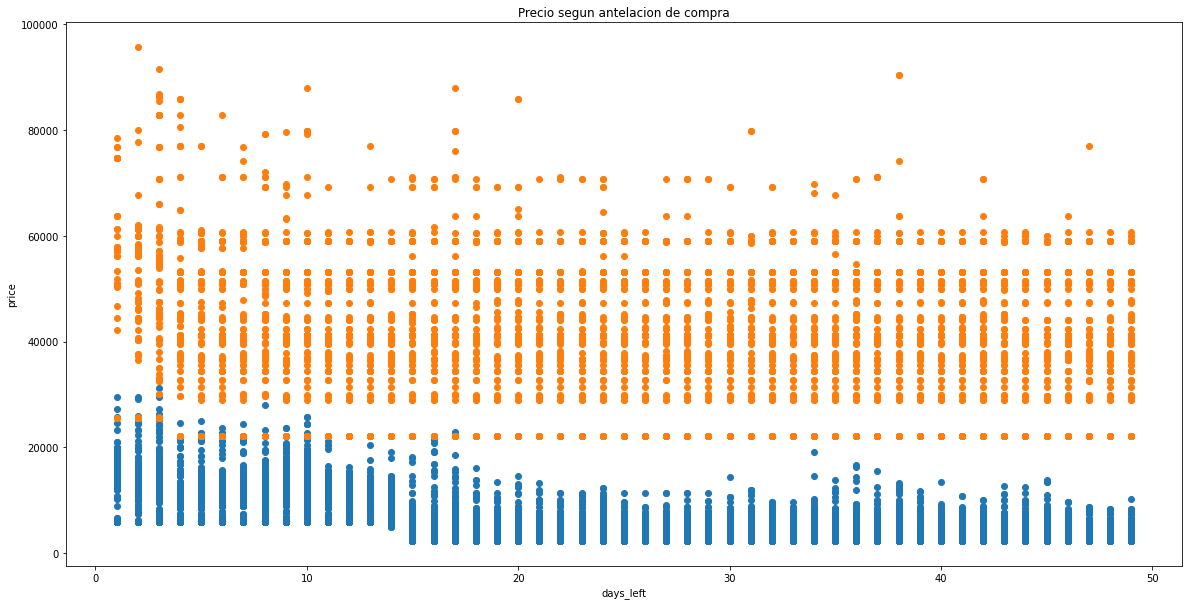

In [46]:
#Creo scatter graph para ver la distribucion de los precios, discriminando entre pasajes economy y business

df_economy = df.query('seat_class == "Economy"')
df_business = df.query('seat_class == "Business"')

plt.figure(figsize=(20,10))
plt.scatter(df_economy['days_left'], df_economy['price'])
plt.scatter(df_business['days_left'], df_business['price'])
plt.title("Precio segun antelacion de compra")
plt.xlabel('days_left')
plt.ylabel('price')


En el grafico de dispersion, tenemos los valores de vuelos economy en azul y en naranja los vuelos business. 

Como se puede ver, la antelacion con la que se compra el pasaje no incide mayormente en los precios mas altos. Destacamos que los precios mas bajos dejan de estar disponibles cuanto mas cerca de la fecha de vuelo antes en el caso de economy que en business.


In [30]:
#Busco el precio minimo de pasaje por antelacion
df.groupby(["days_left"])["price"].min()

days_left
1     5949
2     5949
3     5953
4     5949
5     5949
6     5949
7     5953
8     5953
9     5949
10    5949
11    5949
12    5949
13    5949
14    5001
15    2409
16    2409
17    2409
18    2409
19    2409
20    2409
21    2409
22    2409
23    2409
24    2409
25    2409
26    2409
27    2409
28    2409
29    2409
30    2409
31    2409
32    2409
33    2409
34    2409
35    2409
36    2409
37    2409
38    2409
39    2409
40    2409
41    2409
42    2409
43    2409
44    2409
45    2409
46    2381
47    2281
48    2409
49    2409
Name: price, dtype: int64

Viendo los minimos, vemos que a partir de los 14 dias previos (dos semanas) el precio del pasaje se mas que duplica, pasando a estar un 107% mas caro que los dias anteriores. Y de ahi en adelante sigue estable hasta el dia previo al vuelo.

A su vez vemos tambien vemos que el vuelo mas barato de la muestra fue comprado 47 dias antes.

In [19]:
#Busco el precio minimo de pasaje por antelacion - solo pasajes business
df_business.groupby(["days_left"])["price"].min()

days_left
1     25612
2     25612
3     25612
4     22152
5     22152
6     22152
7     22152
8     22152
9     22152
10    22152
11    22152
12    22152
13    22152
14    22152
15    22152
16    22152
17    22152
18    22152
19    22152
20    22152
21    22152
22    22152
23    22152
24    22152
25    22152
26    22152
27    22152
28    22152
29    22152
30    22152
31    22152
32    22152
33    22152
34    22152
35    22152
36    22152
37    22152
38    22152
39    22152
40    22152
41    22152
42    22152
43    22152
44    22152
45    22152
46    22152
47    22152
48    22152
49    22152
Name: price, dtype: int64

Mirando unicamente los pasajes en business, el cambio en el precio minimo se solamente 3 dias antes del vuelo, aumentando un 15,6%.

**Incidencia de la cantidad de escalas**

stops
one            2381
two_or_more    2568
zero           2281
Name: price, dtype: int64

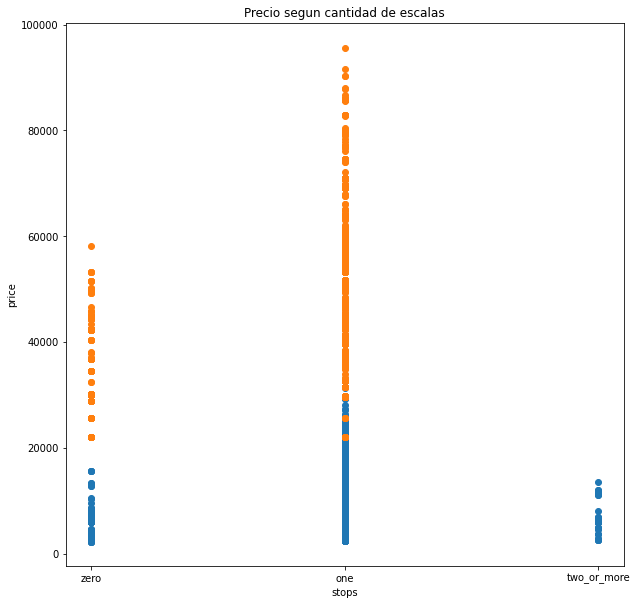

In [49]:
#Creo scatter graphs para ver la distribucion de los precios
plt.figure(figsize=(10,10))
plt.scatter(df_economy['stops'], df_economy['price'])
plt.scatter(df_business['stops'], df_business['price'])
plt.title("Precio segun cantidad de escalas")
plt.xlabel('stops')
plt.ylabel('price')

#Busco el precio minimo de pasaje por cantidad de escalas
df.groupby(["stops"])["price"].min()

Por otra parte, con el grafico que tenemos arriba, que mantiene el mismo codigo de colores, queda en evidencia que la cantidad de escalas no tiene una gran incidencia en el precio del vuelo. Inclusive en el caso de business tenemos pasajes mas caros con una escala que con dos. 

Considerando el caso de economy, se da hasta el caso inverso a lo esperado, siendo el precio mas bajo de los vuelos sin escalas 2.281 mientras que el minimo con dos o mas escalas es 2.568, un 12,6% mas caro que el anterior.

**Influencia de la aerolinea**

<AxesSubplot:xlabel='airline', ylabel='price'>

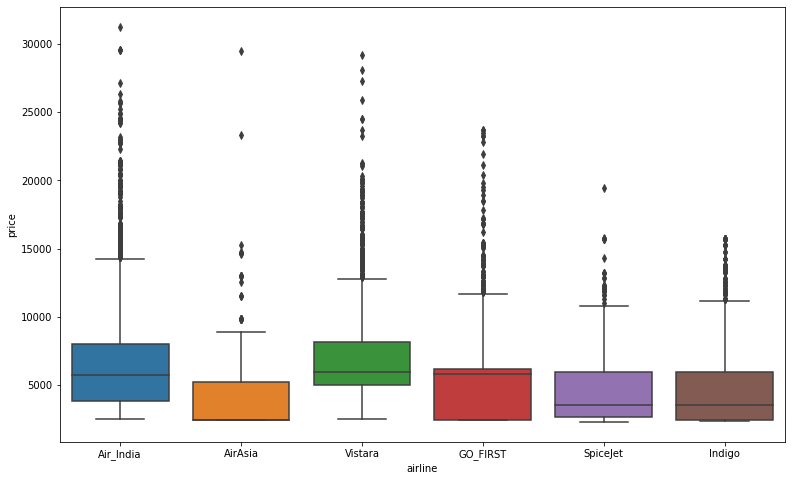

In [25]:
#Grafica boxplot por aerolinea - pasajes business
plt.figure(figsize=(13,8))
sns.boxplot(x='airline',y='price',data=df_economy.sort_values('price',ascending=False))

<AxesSubplot:xlabel='airline', ylabel='price'>

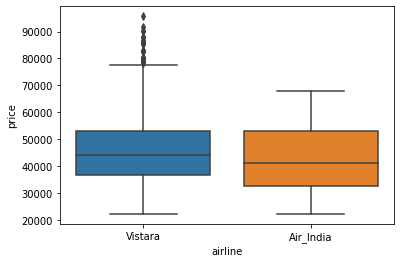

In [20]:
#Grafica boxplot por aerolinea - pasajes business
sns.boxplot(x='airline',y='price',data=df_business.sort_values('price',ascending=False))

Arriba vemos como se distribuyen los precios de los pasajes segun la aerolinea, en la primera grafica el caso de economy y el segundo business. De nuevo se da que no vemos grandes diferencias, aunque si se puede ver que Air India y Vistara tienen precio mas altos en promedio que las demas aerolineas. 

A su vez, en la tabla que se encuentra debajo podemos ver como el minimo precio por pasaje, no es muy dispar entre aerolineas, variando entre 2.281 a 2.476, un 8,5% de diferencia entre el minimo y el maximo.
Se cumple que el vuelo mas barato es de una aerolina "low cost".

In [13]:
#Busco el precio minimo de pasaje por aerolinea
df.groupby(["airline"])["price"].min()

airline
AirAsia      2409
Air_India    2476
GO_FIRST     2410
Indigo       2381
SpiceJet     2281
Vistara      2476
Name: price, dtype: int64

**Precio segun hora de salida**

Por ultimo evaluamos como incide la hora de salida del vuelo en el precio del pasaje.

departure_time
Afternoon        2381
Early_Morning    2281
Evening          2281
Late_Night       2381
Morning          2281
Night            2381
Name: price, dtype: int64

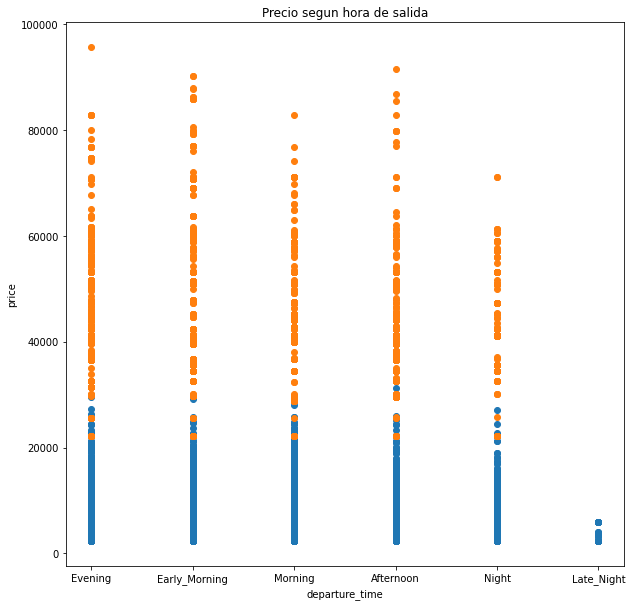

In [52]:
#Creo grafico para ver como influye la hora de salida al precio del pasaje
plt.figure(figsize=(10,10))
plt.scatter(df_economy['departure_time'], df_economy['price'])
plt.scatter(df_business['departure_time'], df_business['price'])
plt.title("Precio segun hora de salida")
plt.xlabel('departure_time')
plt.ylabel('price')

#Precio minimo por hora de salida
df_economy.groupby(["departure_time"])["price"].min()

Nuevamente, no hay un salto significativo en el precio entre una hora y otra. Encontramos que los vuelos que salieron temprano en la manana y al anochecer tuvieron los precios minimos, siendo un 4% mas baratos.

# Resultados 

Respondiendo a la pregunta de que variables podemos usar a nuestro favor asegurar la compra de una pasaje mas barato, en primer lugar podemos descartar que una mayor cantidad de escalas nos asegura un precio mas bajo. El vuelo mas barato es sin escalas, mientras que el vuelo mas barato con dos o mas escalas es un 12,6% mas caro. 

En cuanto a la aerolinea, si bien hay aerolineas que en el grueso son mas caras, a la hora de buscar el minimo, hay como maximo un 8,5% de diferencia en el precio entre ellas, siendo SpiceJet la opcion mas barata. 

Por otra parte, si es importante la antelacion con la que se compra el pasaje, siendo imprecindible comprarlo al menos dos semanas antes en el caso de vuelos de economy, dado que el precio incrementa en un 107% llegados el dia 14 previo al vuelo. En el caso de business se puede encontrar el mismo valor minimo hasta 4 dias antes y luego vemos un incremento en el precio de 15,6%.

Por ultimo, la hora de salida que permite la opcion mas barata, si bien no es una gran diferencia, es saliendo temprano en la manana o al anochecer.

# Conclusiones 

Si buscamos comprar el pasaje mas barato, de acuerdo al caso analizado, deberiamos cumplir con las siguientes reglas:  

1. Idealmente comprar el pasaje 47 dias antes de la fecha de viaje, y nunca con menos de 2 semanas de antelacion.  
2. Buscar un vuelo que salga temprano en la manana o al atardecer.
3. Volar en una aerolinea low-cost

A la hora de considerar las escalas, aprendimos que optar por hacer mas escalas no va a resultar en un vuelo mas barato.
